In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D

In [9]:
df = pd.read_csv('input_data copy.csv')

In [10]:
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,pixel_10000,label
0,6,3,5,3,4,5,3,6,3,3,...,140,184,155,151,140,152,164,189,174,1
1,213,220,232,228,227,248,236,226,225,242,...,5,6,14,8,7,22,28,30,19,2
2,168,173,175,178,184,186,189,192,198,192,...,7,10,12,8,18,21,35,5,10,0
3,97,99,100,102,101,102,100,101,102,102,...,177,191,175,151,149,142,146,143,151,2
4,88,87,88,86,87,89,87,88,88,88,...,50,7,11,15,18,133,139,100,95,0


In [11]:
df.shape

(60, 10001)

In [13]:
df.columns

Index(['pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6',
       'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10',
       ...
       'pixel_9992', 'pixel_9993', 'pixel_9994', 'pixel_9995', 'pixel_9996',
       'pixel_9997', 'pixel_9998', 'pixel_9999', 'pixel_10000', 'label'],
      dtype='object', length=10001)

In [14]:
df.label

0     1
1     2
2     0
3     2
4     0
5     2
6     1
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    0
18    1
19    2
20    2
21    2
22    2
23    1
24    2
25    2
26    1
27    1
28    2
29    1
30    0
31    0
32    1
33    2
34    1
35    2
36    2
37    1
38    0
39    0
40    2
41    2
42    1
43    0
44    0
45    1
46    2
47    1
48    2
49    2
50    2
51    1
52    0
53    0
54    1
55    0
56    0
57    0
58    2
59    0
Name: label, dtype: int64

In [15]:
x = df.drop('label', axis=1)

In [16]:
y = df['label']

<Axes: xlabel='label', ylabel='count'>

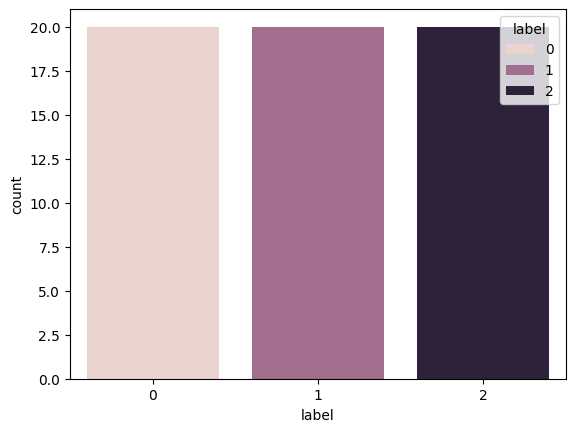

In [18]:
sns.countplot(x=df['label'], data=df, hue='label')

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
x_train = x_train / 255
x_train.shape

(48, 10000)

In [22]:
x_test = x_test / 255
x_test.shape

(12, 10000)

In [23]:
y.unique()

array([1, 2, 0], dtype=int64)

In [24]:
len(y.unique())

3

In [25]:
x_train = x_train.to_numpy()

In [26]:
x_train = x_train.reshape(48, 100, 100, 1)

In [27]:
x_train.shape

(48, 100, 100, 1)

In [28]:
x_test = x_test.to_numpy()

In [29]:
x_test = x_test.reshape(12, 100, 100, 1)

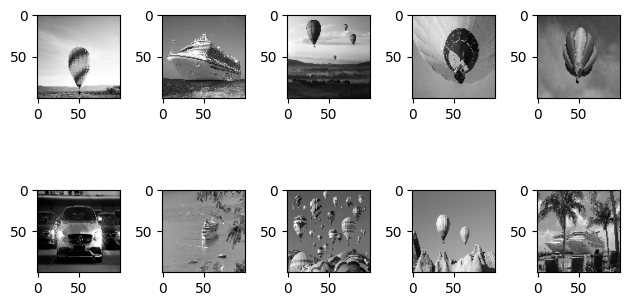

In [31]:
n_rows = 2
n_columns = 5

figure, axis = plt.subplots(nrows= n_rows, ncols= n_columns)

index = 0

for each_row in range(n_rows):
    for each_columns in range(n_columns):
        axis[each_row, each_columns].imshow(x_train[index].reshape(100, 100), cmap='gray')
        index+=1
    plt.tight_layout()

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (2,2), activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [34]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000002696BF5AA90>>

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [42]:
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 10)

Epoch 1/10
2/2 [==============================] - 2s 502ms/step - loss: 1.6588 - accuracy: 0.2917 - val_loss: 1.6466 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 0s 163ms/step - loss: 1.5324 - accuracy: 0.4375 - val_loss: 0.9323 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 170ms/step - loss: 1.1469 - accuracy: 0.3542 - val_loss: 0.7535 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 159ms/step - loss: 0.7137 - accuracy: 0.6667 - val_loss: 0.9609 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 168ms/step - loss: 0.6794 - accuracy: 0.6875 - val_loss: 0.9629 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 162ms/step - loss: 0.6244 - accuracy: 0.6875 - val_loss: 0.8155 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 164ms/step - loss: 0.5343 - accuracy: 0.7917 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 8/10
2/2 [====

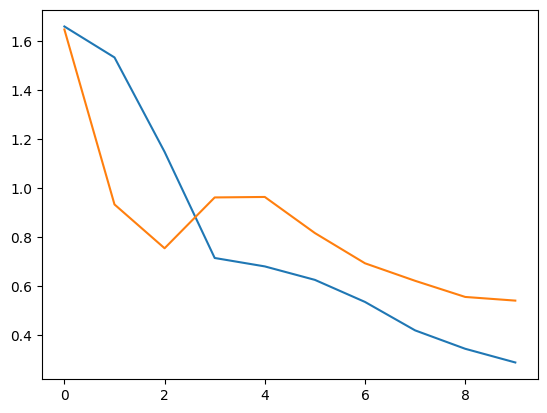

In [43]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

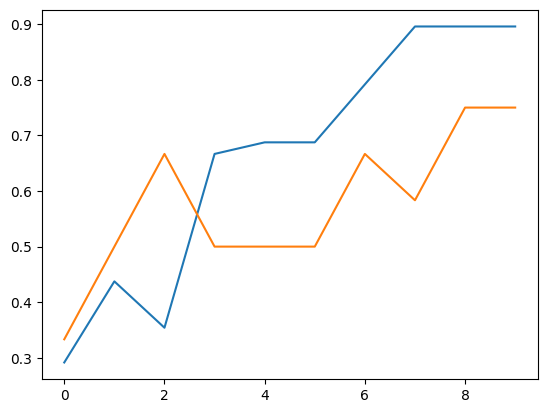

In [44]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')